# 01 Logistic Regression

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.utils import shuffle

We have a data set that has two variables $x1$ and $x2$, each with a label Y that has a value of 1 or 0.  We want to train a Classifier so that it lears to classify new instances of $x1$ and $x2$

In [2]:
raw_df = pd.read_csv('sampleclass.csv')
raw_df = shuffle(raw_df)
raw_df.head()

X1        X2  Y
204 -0.331450 -0.605560  0
168 -0.070161 -0.163450  0
131 -0.271310  0.004386  1
24  -0.080645 -0.564330  0
27   0.186640 -0.166670  0

In [3]:
raw_df.describe()

X1          X2           Y
count  211.000000  211.000000  211.000000
mean    -0.130245   -0.059744    0.502370
std      0.200516    0.314750    0.501183
min     -0.596770   -0.657900    0.000000
25%     -0.287905   -0.313890    0.000000
50%     -0.130300   -0.052924    1.000000
75%      0.013825    0.192690    1.000000
max      0.297240    0.573390    1.000000

If we plot these values in a graph, we see that these form two groups and we would like to train a Classifier 
so that it learns how to separate there groups.

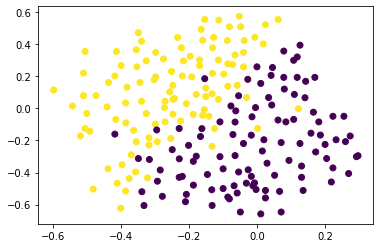

In [4]:
plt.scatter(raw_df["X1"], raw_df["X2"], c=raw_df["Y"])

In [5]:
raw_df.shape

(211, 3)

In [6]:
X = raw_df[['X1', 'X2']]
X.shape

(211, 2)

In [7]:
Y = raw_df[['Y']]

In [8]:
Y.shape

(211, 1)

We will train our Machine Learning algorithm by taking our dataset and dividing it into two subsets. 

The first subset is used to fit the model and is referred to as the training dataset. 

The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

We use the training dataset to teach the machine and we use the test dataset to verify that it actually learned to classify data items it has not seen in the past.

For small datasets, we typically split it 80% training and 20% test.  Larger datasets have more data in the training and less in the test set.

In [9]:
X_train = X[:-20]
X_test = X[-20:]
Y_train = Y[:-20]
Y_test = Y[-20:]

We will end up with 192 samples to train the algorithm and 20 samples to test if it actually learned. 

In [10]:
X_train.shape

(191, 2)

In [11]:
Y_train.shape

(191, 1)

In [12]:
X_test.shape

(20, 2)

In [13]:
Y_test.shape

(20, 1)

In [14]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(X_train, Y_train)
eval_input_fn = make_input_fn(X_test, Y_test, num_epochs=1, shuffle=False)

In [15]:
feature_columns = []
feature_columns.append(tf.feature_column.numeric_column("X1", dtype=tf.float32))
feature_columns.append(tf.feature_column.numeric_column("X2", dtype=tf.float32))

In [16]:

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

#estimator = tf.estimator.LinearClassifier(
#    feature_columns=feature_columns,
#    optimizer=tf.keras.optimizers.Ftrl(
#      learning_rate=0.1,
#      l1_regularization_strength=0.001
#    ))

#estimator = tf.estimator.LinearClassifier(
#    feature_columns=feature_columns,
#    optimizer=lambda: tf.keras.optimizers.Ftrl(
#        learning_rate=tf.exponential_decay(
#            learning_rate=0.1,
#            global_step=tf.get_global_step(),
#            decay_steps=10000,
#            decay_rate=0.96)))

linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)
print(result)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\IVANKR~1\\AppData\\Local\\Temp\\tmpp7tjvj7s', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.rea

C:\Users\Ivan Krsul\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\IVANKR~1\AppData\Local\Temp\tmpp7tjvj7s\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 60...
INFO:tensorflow:Saving checkpoints for 60 into C:\Users\IVANKR~1\AppData\Local\Temp\tmpp7tjvj7s\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 60...
INFO:tensorflow:Loss for final step: 0.49114436.
INFO:tensorflow:Calling model_fn.


C:\Users\Ivan Krsul\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-07-15T17:01:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\IVANKR~1\AppData\Local\Temp\tmpp7tjvj7s\model.ckpt-60
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.47912s
INFO:tensorflow:Finished evaluation at 2021-07-15-17:01:42
INFO:tensorflow:Saving dict for global step 60: accuracy = 0.8, accuracy_baseline = 0.55, auc = 0.85858583, auc_precision_recall = 0.8526777, average_loss = 0.5426794, global_step = 60, label/mean = 0.45, loss = 0.5426794, precision = 0.72727275, prediction/mean = 0.5098223, recall = 0.8888889
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 60: C:\Users\IVANKR~1\AppData\Local\Temp\tmpp7tjvj7s\model.ckpt-60
{'accuracy': 0.8, 'accuracy_baseline': 0.55, 'auc': 0.85858583, 'auc_precision_recall': 0.8526777, 'average_loss': 0.5426794, 'label/mean': 0.45, 'lo

Tensorflow claims an accuracy of 90%.

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\IVANKR~1\AppData\Local\Temp\tmpp7tjvj7s\model.ckpt-60
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


C:\Users\Ivan Krsul\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


<AxesSubplot:title={'center':'predicted probabilities'}, ylabel='Frequency'>

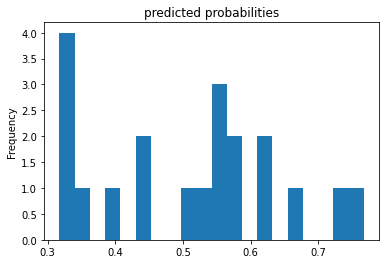

In [17]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])
probs.plot(kind='hist', bins=20, title='predicted probabilities')


Lets visaulize what the Classifier learnt.  We can visualize the Classification Boundary by creating a grid and evaluating the classification for every point in the grid.

In [18]:
h = .02  # step size in the mesh
# create a mesh to plot in
x1_min = -0.7
x1_max = 0.7
x2_min = -0.7
x2_max = 0.7
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

In [19]:
my_array = np.c_[xx1.ravel(), xx2.ravel()]
data_x = pd.DataFrame(my_array, columns = ['X1','X2']) 
data_y = np.zeros((data_x.shape[0],1))
data_x.shape

(4900, 2)

In [20]:
data_x

X1    X2
0    -0.70 -0.70
1    -0.68 -0.70
2    -0.66 -0.70
3    -0.64 -0.70
4    -0.62 -0.70
...    ...   ...
4895  0.60  0.68
4896  0.62  0.68
4897  0.64  0.68
4898  0.66  0.68
4899  0.68  0.68

[4900 rows x 2 columns]

In [21]:
mesh_input_fn = make_input_fn(data_x, data_y, num_epochs=1, shuffle=False)
pred_dicts = list(linear_est.predict(mesh_input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\IVANKR~1\AppData\Local\Temp\tmpp7tjvj7s\model.ckpt-60
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


C:\Users\Ivan Krsul\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [22]:
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

In [23]:
res = np.array(probs > 0.5)*1

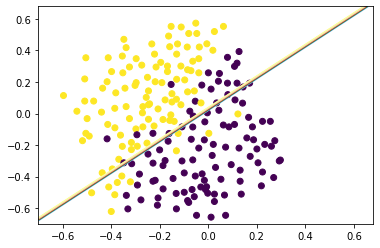

In [24]:
plt.scatter(raw_df["X1"], raw_df["X2"], c=raw_df["Y"])
plt.contour(xx1, xx2, res.reshape(xx1.shape), cmap=plt.cm.Paired)

You can see that the classification algorithm draws a straight line that divides the space so that 90% of precitions are correct.  Linear Regression, as shown here is a linear classifier, so that a straight line is correct, although not accurate enough.